# Chapter 4: Training Models
In this chapter we are going to learn the basis of training a model and how the models work under the hood. This is important as we will want to create models that get better at predicting and understanding the ins and outs of the models will help us tweaking parameters in a way that helps achieve that.

## Linear Regression
The main concept of lineal regression is to find a vector of parameters that will multiplied by the array of features will get closer to the vector of values (to predict). Once they are found, we can insert other feature values, and we should get a predicted value.

In order to get to this weight vector, we can use linear algebra and (Tranpose the features dot features) inverse dot tranposed features dot observed values.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

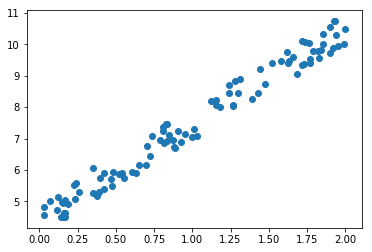

In [2]:
# Let's create a linear dataset with some randomness
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
plt.scatter(X, y);

In [3]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
# These are the coefficient of my linear regression using X
theta_best

array([[4.40491596],
       [3.04138212]])

Now we can make predictions using the parameters we computed

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.40491596],
       [10.48768019]])

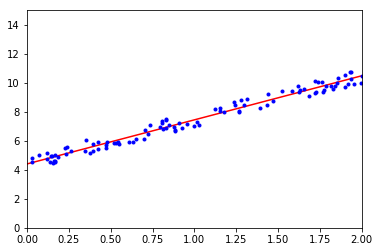

In [6]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# In scikit-learn, would be something like this:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.40491596]), array([[3.04138212]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.40491596],
       [10.48768019]])

## Batch Gradient Descent

With gradient descent, the goal is to find the derivative of the loss function and recompute again on the opposite direction * learning rate. Eventually, you will reach a minimum point. 

In [11]:
eta = 0.1
n_iterations = 1000
m = 100 

theta = np.random.rand(2,1) # random seed

In [12]:
for iteration in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradient

In [13]:
theta

array([[4.40491596],
       [3.04138212]])

In [14]:
gradient

array([[-4.42312853e-15],
       [ 1.05800992e-15]])

Changin the learning rate might help achieving convergence faster. However, setting a high learning rate will try to jump to fast on the solution and might not reach the optimal solution at all. Usually, you might want to set up a lot of iterations but have a stopping point where the norm does not change much on the next iteration. This is called *tolerance*. When doing batch gradient descent, you use the entire data set to find the next iteration point. Because of this, it might take much longer when the training set is large. Aplying **Grid Search** with multiple learning rates and stop conditions might help deciding what a good learning rate might for your problem.

## Stochastic Gradient Descent

With *stochastic gradient descent* the algorim uses only one instance in each iteration to compute the partial derivative. This means that the computation time in each iteration is much smaller, and the alg can be applied as out-of-core as only one instance at the time needs to be in memory. While this is good for big training sets, the alg is not regular as each intance will show an error. When applying **SDG**, a solution will be found after certain number of iterations but not neccesarily an optimal solution. Another benefit is that because it select a random instance at the time, the alg could escape out of local min of the loss function. In general, applying a large learning rate initially and decrease it over time is helpful (this is called *simulated annealing*), the function to determine learning rate on each iteration is called *learning schedule*. 

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[4.41123819],
       [3.04493311]])

The following is the appliation of SDG for linear regressions in scikit-learn

In [60]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/Users/cesarhernandez/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.3925229]), array([3.02715706]))

## Mini-batch Gradient Descent

*Mini-batch Gradient Descent* is a combination of **SHD** and **BGD**. In this process, intead of selected the full training set or only one instance each time, we select a random group of instances. This helps on having a combination of the best of each alg.

## Polynomial Regression

We can use a linear regressor to fit a non-linear model but using power to the features

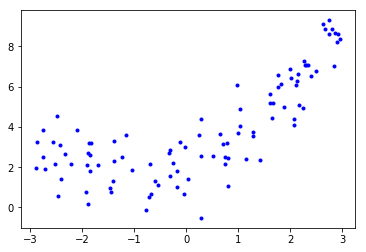

In [41]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'b.')

In [42]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree= 2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [43]:
X[0]

array([-1.45639471])

In [44]:
X_poly[0]

array([-1.45639471,  2.12108554])

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.10057665]), array([[0.93292594, 0.45582705]]))

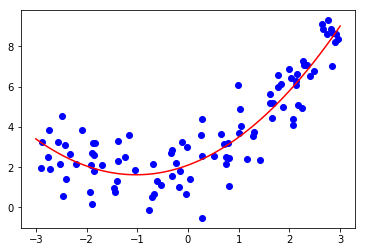

In [46]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'bo')
plt.plot(X_new, y_new, 'r-')

Be careful of adding too many degrees to your data. I will fit very weel the training as it tryies to pass through all the points, but it will be overfitting. In general, you wont know how many degrees your natural data would have. So choosing high degree will be overfitting, and few degrees might be underfitting.

## Learning Curves

The following functions will plot training and validations error with difference sizes of data

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [48]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

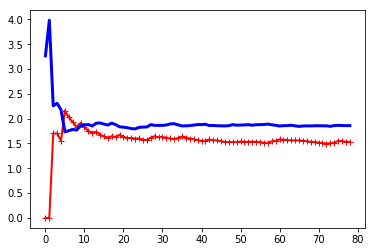

In [53]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

A linear model starts really well on training because it's fitting exactly the 'curve' of 1 or 2 points, then it starts increasing the error. On the other hand, the validation dataset is not doing well. The fact that they both converge on a high MSE means that the model cannot get better with more data and higher degree equations might describe better the data.

[0, 80, 0, 3]

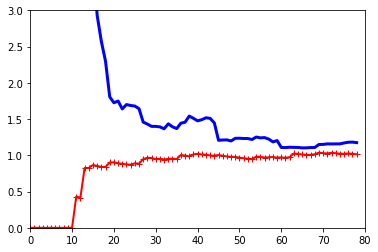

In [56]:
# let's try with 10 degree model
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

# Regularized Linear Models

This are models that have some level of penalization for complexity on the model. The three examples to follow are: *Ridge Regression*, *Lasso Regression* and *Elastic Net*. **Note: For all regularized models, it's important to scale the data as the regularization components are sensitive to the scale of each feature.** (Use StandardScaler) 

## Ridge Regression

This type of regression uses a new term added to the cost function equal to alpha times the sum of square of theta. This means that the bigger then weights are, the bigger the regularization term is. We can use ridge regularization on close-form or with SGD. The bigger the alpha, the more regularization will be, the curve will have smaller variance but more bias (meaning it might underfit your training data). The following are examples using a simple linear model.

In [58]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky') # cholesky is a matrix factorization alg
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.10422458]])

In [63]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/Users/cesarhernandez/anaconda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4.32214203])

## Lasso Regression (Least Absolute Shrinkage and Selection Operator Regression)

Similar to Ridge, it adds a regularization term to the cost function. Only that this time, instead of adding half of the *l2*, it adds norm of *l1*. Lasso tends to eliminate the weight of higher level degrees on your equation. Meaning that if I add 10 degrees, my final model, might look more like a quadratic model given it has eliminated all high degree weights.

In [64]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.06908873])

## Elastic Net

*Elastic Net* is a combination of *Ridge* and *Lasso Regularization*. There is a new hyperparameter that controls the weight assigned to alpha on the cost function and it's use on both *l1* and *l2* terms of the cost function. In general, it's always better to use one regularization over plain linear regression. Lasso will remove coefficients that are not useful, however, if there are too many features (more than the number of training sets), it's preferable to use *Elastic Net*.

In [65]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.06943969])

## Early Stopping

Early stopping is a simple but powerful method. It evaluates both the training and validation error, when the validation error reaches a minimun, the loops stop and select that as best model. It's important to know that with mini-batch GD or SGD, the error jumps quite often, hence a technique is to check if the error remains low after few iterations over and if so, then use the first minimum reached' model.

In [67]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_ref = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42) # warm state starts the model where it left us

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continue because warm_start = True
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [73]:
best_epoch

376

# Logistic Regression (for classification)

Logistic regression is like a linear regression but the values are transformed to follow a log function. They are good to get a classification and probability of belongnning to a certain class. There is no close-form equation to get to the optimal result but using GD methods, we can get close to the optimal solution. 

## Decision Boundaries

The *decision boundary* is the point where the probability of being of a class and non being of that class cross. Hence, if the prob to be of a class is beyond that point, it would be predicted as being a part of tha class end before that point as not being part of the class. Let's look at the info using the iris dataset.

In [75]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [76]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int)

In [87]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

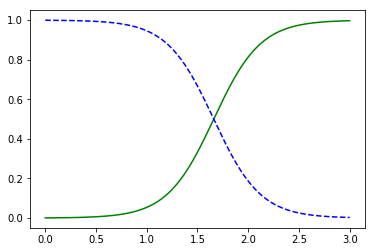

In [88]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='No Iris-Virginica')

*Decision boundary* on the above example is around 1.6 as the prob of being Iris-Virginica goes passes the 50% threshold and conversively the prob of not being Iris-Virginica goes below 50%.

In [91]:
# easy to see in this example
log_reg.predict([[1.5], [1.7]])

array([0, 1])

Regularization in sklearn implementation of logistic regression uses **l2** but uses a *c* which is the inverse of alpha, meaning a higher *c* would decrease the penalty.

## Softmax Regression
It's a generalization of **Logistic Regressions** but this time, it can be used with multiple classes concurretly. So, the steps are as follow:
* Compute a logistic regression for each class
* Compute exponential of all scores 
* Normalize the scores by the sum o all the exponentials

*Softmax* is multiclass, not multioutput. Meaning the classes should be exclusive from each other as the alg will select the class with the highest probability. This needs to be verified, but my understanding is that **Softmax** will execute a binary classification on each class and then normalize the results while one-vs-all logistic regression might skip the normalization.


In [92]:
X = iris['data'][:, (2, 3)] # using petal and width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
softmax_reg.predict([[5, 2]])

array([2])

In [94]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])